### Get Data into correct DataFrame

In [62]:
### get data
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/TimeSeries/master/energy_F2024.csv")

df.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,8/1/2018 4:00,8/1/2018 0:00,RFC,WEST,AEP,AEPAPT,4050.612,True
1,8/1/2018 5:00,8/1/2018 1:00,RFC,WEST,AEP,AEPAPT,3855.341,True
2,8/1/2018 6:00,8/1/2018 2:00,RFC,WEST,AEP,AEPAPT,3744.805,True
3,8/1/2018 7:00,8/1/2018 3:00,RFC,WEST,AEP,AEPAPT,3665.854,True
4,8/1/2018 8:00,8/1/2018 4:00,RFC,WEST,AEP,AEPAPT,3681.299,True


In [63]:
### use the ept_time

df = df.drop(columns=['datetime_beginning_utc'])

In [64]:
df.columns

Index(['datetime_beginning_ept', 'nerc_region', 'mkt_region', 'zone',
       'load_area', 'mw', 'is_verified'],
      dtype='object')

##### For this assignment, you will need to roll up the data to TOTAL AVERAGE DAILY usage by month and answer the following questions (i.e. find the total daily usage and then roll this up to get the average total daily usage for each month).

In [65]:
### convert the column to a datetime object, then drop the hour component
df['datetime_beginning_ept'] = pd.to_datetime(df['datetime_beginning_ept'])
df['datetime_beginning_ept'] = df['datetime_beginning_ept'].dt.date

In [66]:
df.head(10)

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2018-08-01,RFC,WEST,AEP,AEPAPT,4050.612,True
1,2018-08-01,RFC,WEST,AEP,AEPAPT,3855.341,True
2,2018-08-01,RFC,WEST,AEP,AEPAPT,3744.805,True
3,2018-08-01,RFC,WEST,AEP,AEPAPT,3665.854,True
4,2018-08-01,RFC,WEST,AEP,AEPAPT,3681.299,True
5,2018-08-01,RFC,WEST,AEP,AEPAPT,3794.360,True
6,2018-08-01,RFC,WEST,AEP,AEPAPT,4021.192,True
7,2018-08-01,RFC,WEST,AEP,AEPAPT,4217.335,True
8,2018-08-01,RFC,WEST,AEP,AEPAPT,4394.209,True
9,2018-08-01,RFC,WEST,AEP,AEPAPT,4595.715,True


In [67]:
df.is_verified.value_counts()

is_verified
True    52608
Name: count, dtype: int64

In [68]:
df = df.drop(columns=['is_verified'])
df.head()

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw
0,2018-08-01,RFC,WEST,AEP,AEPAPT,4050.612
1,2018-08-01,RFC,WEST,AEP,AEPAPT,3855.341
2,2018-08-01,RFC,WEST,AEP,AEPAPT,3744.805
3,2018-08-01,RFC,WEST,AEP,AEPAPT,3665.854
4,2018-08-01,RFC,WEST,AEP,AEPAPT,3681.299


In [69]:
### now we need to aggregate each observation from being an hour in a day, to a day in a month. This will make the df
### a Series, and we will transform it back in a df after we resest the index in the next step

df = df.groupby(['datetime_beginning_ept','nerc_region','mkt_region','zone','load_area'])['mw'].sum()

df

datetime_beginning_ept  nerc_region  mkt_region  zone  load_area
2018-08-01              RFC          WEST        AEP   AEPAPT       110120.449
2018-08-02              RFC          WEST        AEP   AEPAPT       108871.637
2018-08-03              RFC          WEST        AEP   AEPAPT       106642.465
2018-08-04              RFC          WEST        AEP   AEPAPT       108985.285
2018-08-05              RFC          WEST        AEP   AEPAPT       110821.779
                                                                       ...    
2024-07-27              RFC          WEST        AEP   AEPAPT       103531.864
2024-07-28              RFC          WEST        AEP   AEPAPT       103796.881
2024-07-29              RFC          WEST        AEP   AEPAPT       109841.511
2024-07-30              RFC          WEST        AEP   AEPAPT       112083.318
2024-07-31              RFC          WEST        AEP   AEPAPT       117163.978
Name: mw, Length: 2192, dtype: float64

In [70]:
### convert it back to a dataframe, with df.reset_index()

df = df.reset_index()
df['datetime_beginning_ept'] = pd.to_datetime(df['datetime_beginning_ept'])
df['datetime_beginning_ept'] = df['datetime_beginning_ept'].dt.date
df.head()

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw
0,2018-08-01,RFC,WEST,AEP,AEPAPT,110120.449
1,2018-08-02,RFC,WEST,AEP,AEPAPT,108871.637
2,2018-08-03,RFC,WEST,AEP,AEPAPT,106642.465
3,2018-08-04,RFC,WEST,AEP,AEPAPT,108985.285
4,2018-08-05,RFC,WEST,AEP,AEPAPT,110821.779


In [71]:
df.dtypes

datetime_beginning_ept     object
nerc_region                object
mkt_region                 object
zone                       object
load_area                  object
mw                        float64
dtype: object

In [72]:
df['datetime_beginning_ept'] = pd.to_datetime(df['datetime_beginning_ept'])
df['days_in_month'] = df['datetime_beginning_ept'].dt.day
df.head()

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,days_in_month
0,2018-08-01,RFC,WEST,AEP,AEPAPT,110120.449,1
1,2018-08-02,RFC,WEST,AEP,AEPAPT,108871.637,2
2,2018-08-03,RFC,WEST,AEP,AEPAPT,106642.465,3
3,2018-08-04,RFC,WEST,AEP,AEPAPT,108985.285,4
4,2018-08-05,RFC,WEST,AEP,AEPAPT,110821.779,5


In [73]:
### get the yyyy-mm combo

df['yyyy_mm'] = df['datetime_beginning_ept'].dt.to_period('M')

df.head()



,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,days_in_month,yyyy_mm
0,2018-08-01,RFC,WEST,AEP,AEPAPT,110120.449,1,2018-08
1,2018-08-02,RFC,WEST,AEP,AEPAPT,108871.637,2,2018-08
2,2018-08-03,RFC,WEST,AEP,AEPAPT,106642.465,3,2018-08
3,2018-08-04,RFC,WEST,AEP,AEPAPT,108985.285,4,2018-08
4,2018-08-05,RFC,WEST,AEP,AEPAPT,110821.779,5,2018-08


In [74]:
### get the max day from the yyyy-mm combo

df['max_day_in_month'] = df.groupby('yyyy_mm')['days_in_month'].transform('max')

df.head()

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,days_in_month,yyyy_mm,max_day_in_month
0,2018-08-01,RFC,WEST,AEP,AEPAPT,110120.449,1,2018-08,31
1,2018-08-02,RFC,WEST,AEP,AEPAPT,108871.637,2,2018-08,31
2,2018-08-03,RFC,WEST,AEP,AEPAPT,106642.465,3,2018-08,31
3,2018-08-04,RFC,WEST,AEP,AEPAPT,108985.285,4,2018-08,31
4,2018-08-05,RFC,WEST,AEP,AEPAPT,110821.779,5,2018-08,31


In [75]:
df = df.drop(columns=['yyyy_mm','days_in_month'])

df.head()

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,max_day_in_month
0,2018-08-01,RFC,WEST,AEP,AEPAPT,110120.449,31
1,2018-08-02,RFC,WEST,AEP,AEPAPT,108871.637,31
2,2018-08-03,RFC,WEST,AEP,AEPAPT,106642.465,31
3,2018-08-04,RFC,WEST,AEP,AEPAPT,108985.285,31
4,2018-08-05,RFC,WEST,AEP,AEPAPT,110821.779,31


In [76]:
df['month_year'] = df['datetime_beginning_ept'].dt.to_period('M')

In [77]:
df_month = df.drop(columns=['datetime_beginning_ept'])


In [78]:
df_month.head(5)

,nerc_region,mkt_region,zone,load_area,mw,max_day_in_month,month_year
0,RFC,WEST,AEP,AEPAPT,110120.449,31,2018-08
1,RFC,WEST,AEP,AEPAPT,108871.637,31,2018-08
2,RFC,WEST,AEP,AEPAPT,106642.465,31,2018-08
3,RFC,WEST,AEP,AEPAPT,108985.285,31,2018-08
4,RFC,WEST,AEP,AEPAPT,110821.779,31,2018-08


In [79]:
df_month_agg = df_month.groupby(['nerc_region','mkt_region','zone','load_area','max_day_in_month','month_year'])['mw'].sum()
df_month_agg

nerc_region  mkt_region  zone  load_area  max_day_in_month  month_year
RFC          WEST        AEP   AEPAPT     28                2019-02       3275952.712
                                                            2021-02       3532369.258
                                                            2022-02       3340456.103
                                                            2023-02       2999227.176
                                          29                2020-02       3392013.933
                                                                             ...     
                                          31                2023-12       3448270.505
                                                            2024-01       3932111.543
                                                            2024-03       2965310.501
                                                            2024-05       2863142.963
                                                            2024-07  

In [80]:
df_month_agg = df_month_agg.reset_index()
df_month_agg

,nerc_region,mkt_region,zone,load_area,max_day_in_month,month_year,mw
0,RFC,WEST,AEP,AEPAPT,28,2019-02,3275952.712
1,RFC,WEST,AEP,AEPAPT,28,2021-02,3532369.258
2,RFC,WEST,AEP,AEPAPT,28,2022-02,3340456.103
3,RFC,WEST,AEP,AEPAPT,28,2023-02,2999227.176
4,RFC,WEST,AEP,AEPAPT,29,2020-02,3392013.933
...,...,...,...,...,...,...,...
67,RFC,WEST,AEP,AEPAPT,31,2023-12,3448270.505
68,RFC,WEST,AEP,AEPAPT,31,2024-01,3932111.543
69,RFC,WEST,AEP,AEPAPT,31,2024-03,2965310.501
70,RFC,WEST,AEP,AEPAPT,31,2024-05,2863142.963


In [81]:
df_month_agg.rename(columns ={'mw':'mw_sum'}, inplace=True)
df_month_agg.head()

,nerc_region,mkt_region,zone,load_area,max_day_in_month,month_year,mw_sum
0,RFC,WEST,AEP,AEPAPT,28,2019-02,3275952.712
1,RFC,WEST,AEP,AEPAPT,28,2021-02,3532369.258
2,RFC,WEST,AEP,AEPAPT,28,2022-02,3340456.103
3,RFC,WEST,AEP,AEPAPT,28,2023-02,2999227.176
4,RFC,WEST,AEP,AEPAPT,29,2020-02,3392013.933


In [82]:
df_month_agg['mw_daily_avg'] = df_month_agg.mw_sum/df_month_agg.max_day_in_month
df_month_agg.head()

,nerc_region,mkt_region,zone,load_area,max_day_in_month,month_year,mw_sum,mw_daily_avg
0,RFC,WEST,AEP,AEPAPT,28,2019-02,3275952.712,116998.311143
1,RFC,WEST,AEP,AEPAPT,28,2021-02,3532369.258,126156.044929
2,RFC,WEST,AEP,AEPAPT,28,2022-02,3340456.103,119302.003679
3,RFC,WEST,AEP,AEPAPT,28,2023-02,2999227.176,107115.256286
4,RFC,WEST,AEP,AEPAPT,29,2020-02,3392013.933,116965.997690


In [83]:
# now make month_year the index

df_month_agg['month_year'] = pd.to_datetime(df_month_agg['month_year'].astype(str), format='%Y-%m')
df_month_agg.set_index('month_year', inplace=True)
df_month_agg.sort_index(inplace=True)
df_month_agg.head()



,nerc_region,mkt_region,zone,load_area,max_day_in_month,mw_sum,mw_daily_avg
month_year,,,,,,,
2018-08-01,RFC,WEST,AEP,AEPAPT,31,3479278.136,112234.778581
2018-09-01,RFC,WEST,AEP,AEPAPT,30,3184945.980,106164.866000
2018-10-01,RFC,WEST,AEP,AEPAPT,31,3132505.778,101048.573484
2018-11-01,RFC,WEST,AEP,AEPAPT,30,3308889.192,110296.306400
2018-12-01,RFC,WEST,AEP,AEPAPT,31,3711803.067,119735.582806


In [85]:
df_month_agg.index.name = None
df_month_agg.head()

,nerc_region,mkt_region,zone,load_area,max_day_in_month,mw_sum,mw_daily_avg
2018-08-01,RFC,WEST,AEP,AEPAPT,31,3479278.136,112234.778581
2018-09-01,RFC,WEST,AEP,AEPAPT,30,3184945.980,106164.866000
2018-10-01,RFC,WEST,AEP,AEPAPT,31,3132505.778,101048.573484
2018-11-01,RFC,WEST,AEP,AEPAPT,30,3308889.192,110296.306400
2018-12-01,RFC,WEST,AEP,AEPAPT,31,3711803.067,119735.582806


In [86]:
df_month_agg.head(25)

,nerc_region,mkt_region,zone,load_area,max_day_in_month,mw_sum,mw_daily_avg
2018-08-01,RFC,WEST,AEP,AEPAPT,31,3479278.136,112234.778581
2018-09-01,RFC,WEST,AEP,AEPAPT,30,3184945.980,106164.866000
2018-10-01,RFC,WEST,AEP,AEPAPT,31,3132505.778,101048.573484
2018-11-01,RFC,WEST,AEP,AEPAPT,30,3308889.192,110296.306400
2018-12-01,RFC,WEST,AEP,AEPAPT,31,3711803.067,119735.582806
2019-01-01,RFC,WEST,AEP,AEPAPT,31,4041373.165,130366.876290
2019-02-01,RFC,WEST,AEP,AEPAPT,28,3275952.712,116998.311143
2019-03-01,RFC,WEST,AEP,AEPAPT,31,3455634.552,111472.082323
2019-04-01,RFC,WEST,AEP,AEPAPT,30,2831890.199,94396.339967
2019-05-01,RFC,WEST,AEP,AEPAPT,31,3057063.714,98614.958516


In [87]:
final_df = df_month_agg.drop(columns=['max_day_in_month'])

In [88]:
final_df.head()

,nerc_region,mkt_region,zone,load_area,mw_sum,mw_daily_avg
2018-08-01,RFC,WEST,AEP,AEPAPT,3479278.136,112234.778581
2018-09-01,RFC,WEST,AEP,AEPAPT,3184945.980,106164.866000
2018-10-01,RFC,WEST,AEP,AEPAPT,3132505.778,101048.573484
2018-11-01,RFC,WEST,AEP,AEPAPT,3308889.192,110296.306400
2018-12-01,RFC,WEST,AEP,AEPAPT,3711803.067,119735.582806


In [93]:
energy_train = final_df['2018-08-01':'2022-07-01']
energy_validate = final_df['2022-08-01':'2023-07-01']
energy_test = final_df['2023-08-01':'2024-07-01']

In [95]:
print(energy_train.tail(2))

print(energy_validate.tail(2))

print(energy_test.tail(2))

           nerc_region mkt_region zone load_area       mw_sum   mw_daily_avg
2022-06-01         RFC       WEST  AEP    AEPAPT  3144455.981  104815.199367
2022-07-01         RFC       WEST  AEP    AEPAPT  3407835.341  109930.172290
           nerc_region mkt_region zone load_area       mw_sum   mw_daily_avg
2023-06-01         RFC       WEST  AEP    AEPAPT  2825087.479   94169.582633
2023-07-01         RFC       WEST  AEP    AEPAPT  3315745.786  106959.541484
           nerc_region mkt_region zone load_area       mw_sum   mw_daily_avg
2024-06-01         RFC       WEST  AEP    AEPAPT  3160997.528  105366.584267
2024-07-01         RFC       WEST  AEP    AEPAPT  3468063.799  111873.025774


### Time Series HW Questions:

#### 1. Using the total daily average by month in the training data set, what is the median value?

In [96]:
energy_train.mw_daily_avg.median()

106820.89638709677

#### 2. Decompose your training data by using the STL decomposition assuming there is a monthly seasonality .  Describe what you see in your decomposition .  Describe what you observe for each component (feel free to use other plots to help you describe seasonality and trend).  Which components explain the most variability? Use your Fs and Ft to help guide your discussions.

In [98]:
import matplotlib.pyplot as plt

In [101]:
energy_train.head(20)

,nerc_region,mkt_region,zone,load_area,mw_sum,mw_daily_avg
2018-08-01,RFC,WEST,AEP,AEPAPT,3479278.136,112234.778581
2018-09-01,RFC,WEST,AEP,AEPAPT,3184945.980,106164.866000
2018-10-01,RFC,WEST,AEP,AEPAPT,3132505.778,101048.573484
2018-11-01,RFC,WEST,AEP,AEPAPT,3308889.192,110296.306400
2018-12-01,RFC,WEST,AEP,AEPAPT,3711803.067,119735.582806
2019-01-01,RFC,WEST,AEP,AEPAPT,4041373.165,130366.876290
2019-02-01,RFC,WEST,AEP,AEPAPT,3275952.712,116998.311143
2019-03-01,RFC,WEST,AEP,AEPAPT,3455634.552,111472.082323
2019-04-01,RFC,WEST,AEP,AEPAPT,2831890.199,94396.339967
2019-05-01,RFC,WEST,AEP,AEPAPT,3057063.714,98614.958516


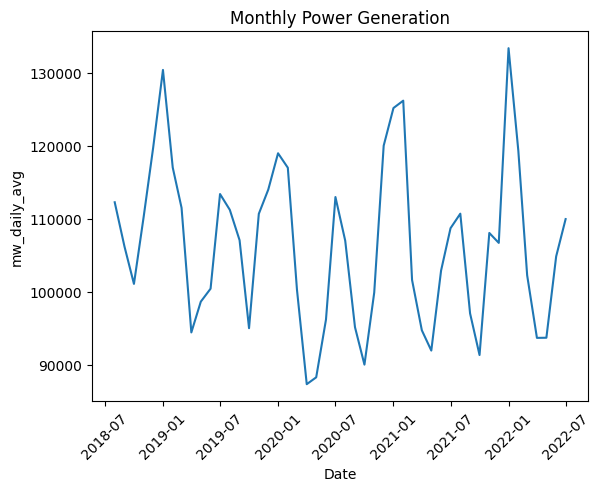

In [100]:
plt.plot(energy_train["mw_daily_avg"])
plt.xlabel("Date")
plt.ylabel("mw_daily_avg")
plt.title("Monthly Power Generation")
plt.xticks(rotation=45)
plt.show()

In [103]:
#libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

from statsforecast import StatsForecast

In [104]:
## STL Decomposition

from statsforecast.models import MSTL

# format for the STL Decomp
d = {'unique_id': 1, 'ds': energy_train.index, 'y': energy_train['mw_daily_avg']}
energy_sf = pd.DataFrame(data = d)

dcmp = StatsForecast(models = [MSTL(season_length = 12)], freq = 'M')
dcmp.fit(df = energy_sf)

StatsForecast(models=[MSTL])

In [106]:
result = dcmp.fitted_[0,0].model_
result.head()

,data,trend,seasonal,remainder
0,112234.778581,110944.915976,3187.114596,-1897.251991
1,106164.866000,110725.197074,-5111.232770,550.901696
2,101048.573484,110506.080384,-12165.577801,2708.070901
3,110296.306400,110288.770396,550.368433,-542.832429
4,119735.582806,110072.395665,9055.973005,607.214137


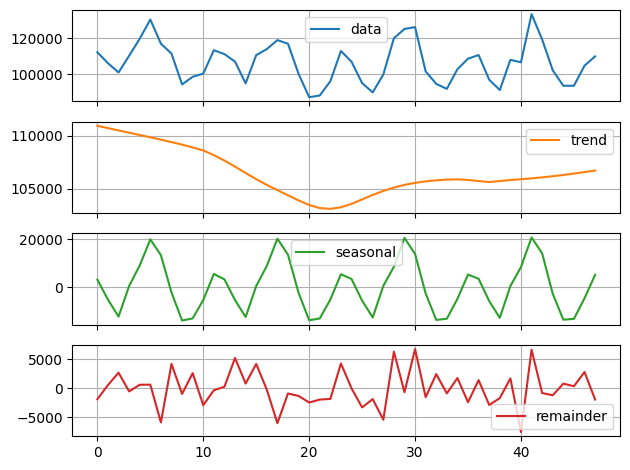

In [107]:
dcmp.fitted_[0, 0].model_.plot(subplots=True, grid=True)
## array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

plt.tight_layout()
plt.show()

### Trend Strength from an STL Decomposition

In [120]:
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Assuming 'energy_train' is a DataFrame with 'mw_daily_avg' and datetime index
data = energy_train['mw_daily_avg']

# Perform STL decomposition
stl = STL(data, period=12)  # Adjust period as needed for your data
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
data = result.observed  # Original data

# Calculate Trend Strength
if not trend.empty and not residual.empty:
    var_residual = residual.var()
    var_detrended = (data - trend).var()

    # Check for division by zero
    if var_detrended == 0:
        print("Variance of detrended series is zero, cannot calculate trend strength.")
    else:
        trend_strength = 1 - (var_residual / var_detrended)
        print(f"Trend Strength: {trend_strength:.2f}")
else:
    print("Trend or Residual series is empty.")

# Calculate Seasonal Strength
if not seasonal.empty and not trend.empty:
    var_seasonal = seasonal.var()
    detrended = data - trend
    var_detrended = detrended.var()

    # Check for division by zero
    if var_detrended == 0:
        print("Variance of detrended series is zero, cannot calculate seasonal strength.")
    else:
        seasonal_strength = var_seasonal / var_detrended
        print(f"Seasonal Strength: {seasonal_strength:.2f}")
else:
    print("Seasonal or Trend series is empty.")

    #if less than 0, put in 0


Trend Strength: 0.95
Seasonal Strength: 0.94


In [122]:
result